In [76]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [77]:
#importing datset
df=pd.read_csv('/content/health_insurance.xls')

In [78]:
# Displaying first 5 rows
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


In [79]:
#shape of the df
df.shape

(1300, 8)

In [80]:
# info regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1300 non-null   int64  
 1   gender        1300 non-null   object 
 2   bmi           1300 non-null   float64
 3   bp            1300 non-null   int64  
 4   children      1300 non-null   int64  
 5   region        1300 non-null   object 
 6   smoker        1300 non-null   object 
 7   medical_cost  1300 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 81.4+ KB


In [81]:
#descriptive statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1300.0,42.280769,14.024847,19.0000,29.75000,42.00000,54.000000,69.00000
bmi,1300.0,31.581396,6.356487,15.2900,27.20750,31.64500,35.488750,57.13000
bp,1300.0,147.774615,11.221987,120.0000,140.00000,150.00000,156.000000,178.00000
children,1300.0,1.104615,1.208697,0.0000,0.00000,1.00000,2.000000,5.00000
medical_cost,1300.0,13243.214691,12060.371167,1121.8739,4760.15595,9388.75365,16579.959053,63770.42801


In [82]:
# segregating numerical and categorical data
numerical_data=df.select_dtypes(include=['int64','float64']).columns.to_list()
categorical_data=df.select_dtypes(include=['object']).columns.to_list()

In [83]:
print(numerical_data)
print(categorical_data)

['age', 'bmi', 'bp ', 'children', 'medical_cost']
['gender', 'region', 'smoker']


In [84]:
#statistic of categorical data
for i in categorical_data:
  print('*'*10,i,'*'*10)
  print(df[i].value_counts())

********** gender **********
gender
F    657
M    643
Name: count, dtype: int64
********** region **********
region
southeast    356
northwest    315
northeast    315
southwest    314
Name: count, dtype: int64
********** smoker **********
smoker
non-smoker    1035
smoker         265
Name: count, dtype: int64


In [85]:
# visualization of pie-chart
def pie_chart(feature):
  plt.pie(df[feature].value_counts(),labels=df[feature].value_counts().index,autopct='%1.1f%%')
  plt.title(f'Distribution of {feature}')
  plt.show()

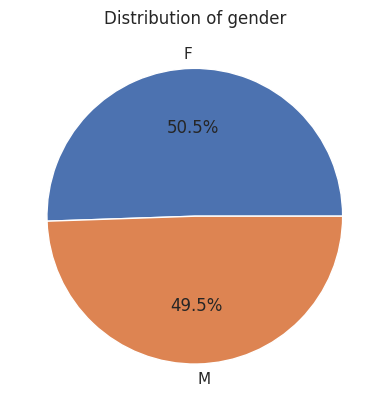

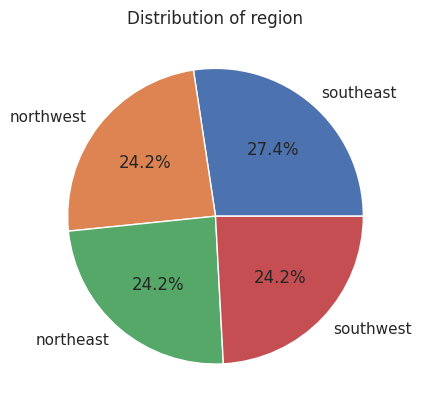

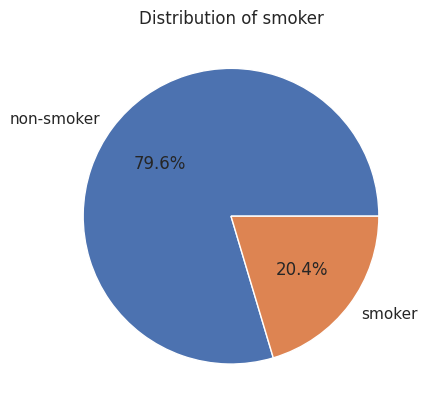

In [86]:
for i in categorical_data:
  pie_chart(i)

In [87]:
#percentile distribution of numerical cols
percentile={}
for i in numerical_data:
  percentile[i]={'25 percentile':np.percentile(df[i],25),'50 percentile':np.percentile(df[i],50),'75 percentile':np.percentile(df[i],75)}
print(percentile)

{'age': {'25 percentile': 29.75, '50 percentile': 42.0, '75 percentile': 54.0}, 'bmi': {'25 percentile': 27.2075, '50 percentile': 31.645, '75 percentile': 35.488749999999996}, 'bp ': {'25 percentile': 140.0, '50 percentile': 150.0, '75 percentile': 156.0}, 'children': {'25 percentile': 0.0, '50 percentile': 1.0, '75 percentile': 2.0}, 'medical_cost': {'25 percentile': 4760.15595, '50 percentile': 9388.753649999999, '75 percentile': 16579.959052500002}}


In [88]:
#converting categorical cols into numerical cols:
encoder=LabelEncoder()
for i in categorical_data:
  df[i]=encoder.fit_transform(df[i])

In [89]:
#Checking for Null values
df.isna().sum()

,0
age,0
gender,0
bmi,0
bp,0
children,0
region,0
smoker,0
medical_cost,0


In [90]:
def histogram(feature):
   sns.histplot(df[feature], bins=10, kde=True, color='blue')
   plt.xlabel(feature)
   plt.ylabel('Frequency')
   plt.title(f'Histogram of {feature}')
   plt.show()

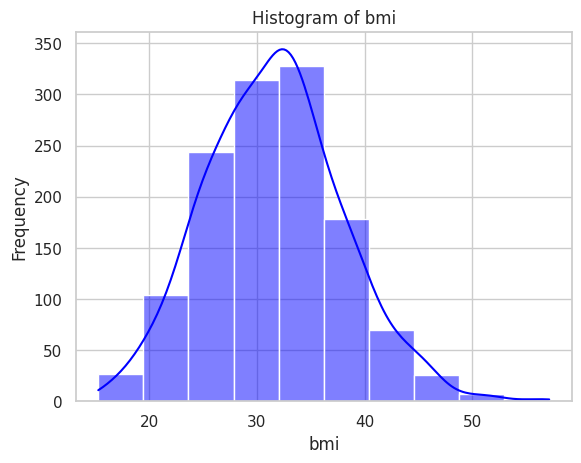

In [91]:
histogram('bmi')

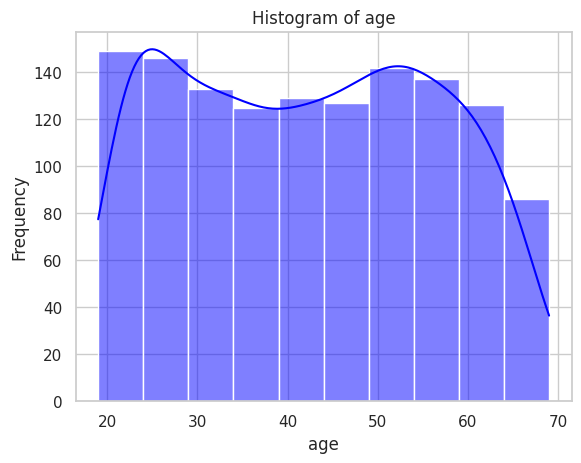

In [92]:
histogram('age')

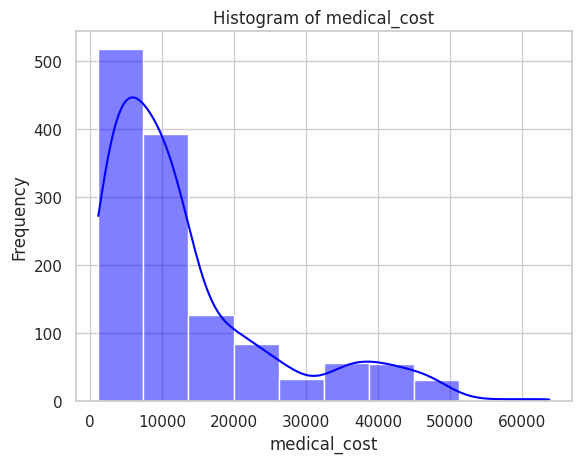

In [93]:
histogram('medical_cost')

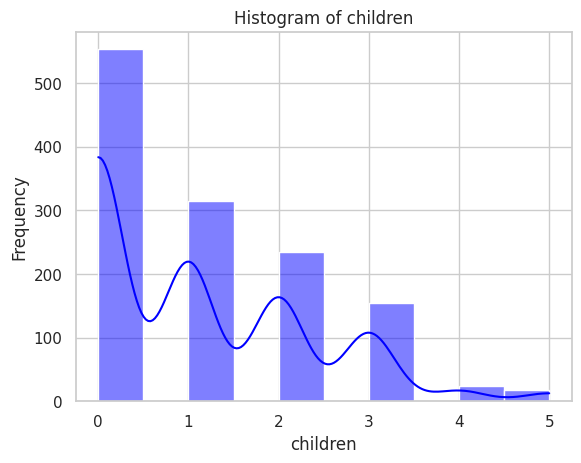

In [94]:
histogram('children')

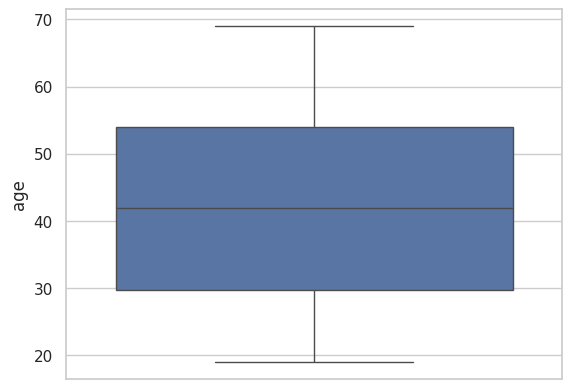

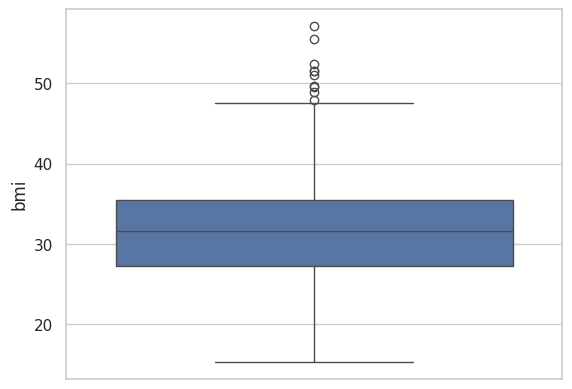

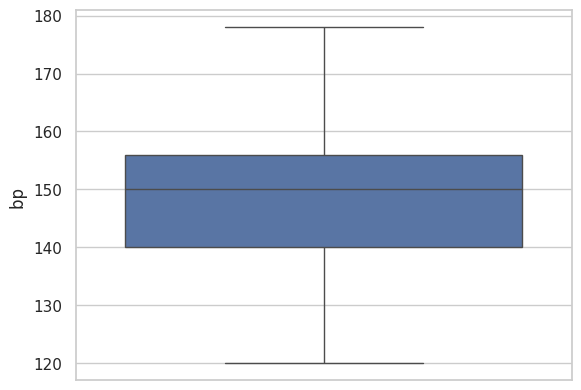

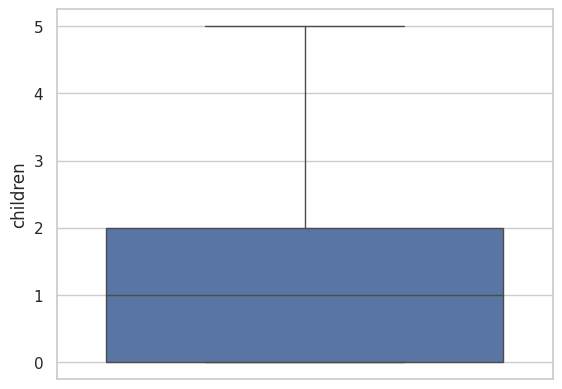

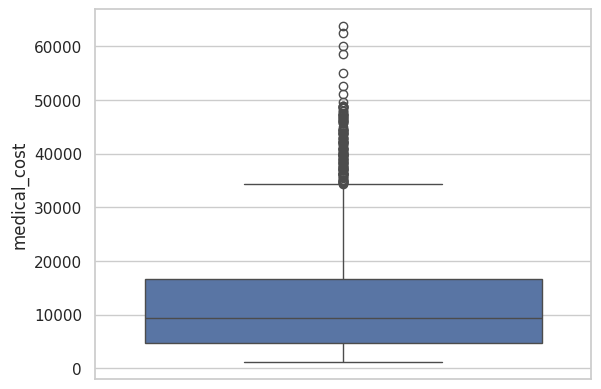

In [95]:
# checking for outliers in the data
for i in numerical_data:
  sns.boxplot(df[i])
  plt.show()

In [96]:
# From the visualizations it is evident that BMI and medical cost have outliers
#we will remove outliers using IQR method
outliers=['bmi','medical_cost']
for i in outliers:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  df[i]=np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))

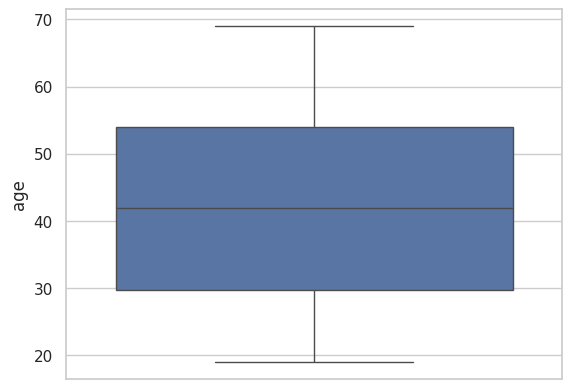

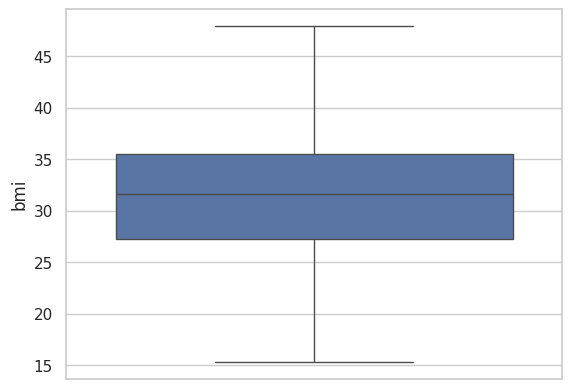

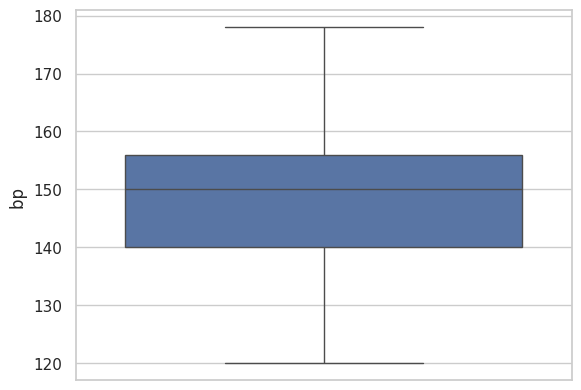

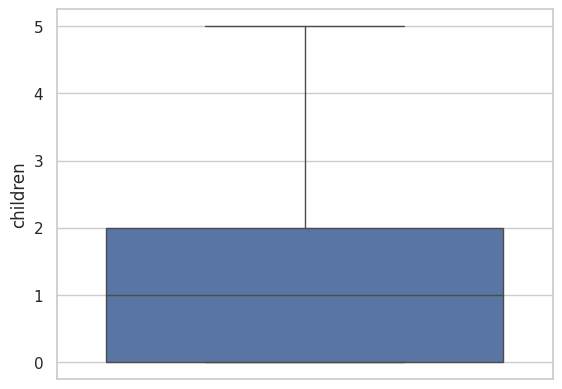

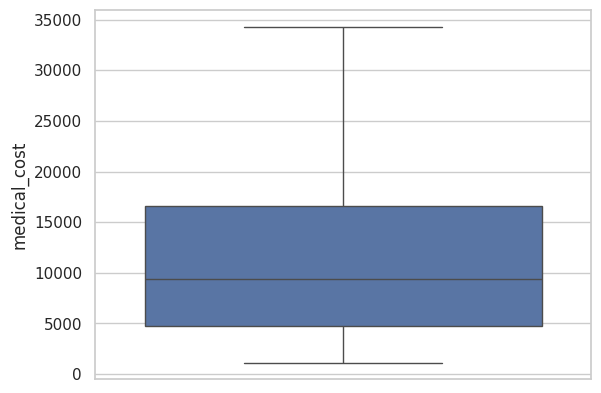

In [97]:
# checking for outliers in the data
for i in numerical_data:
  sns.boxplot(df[i])
  plt.show()

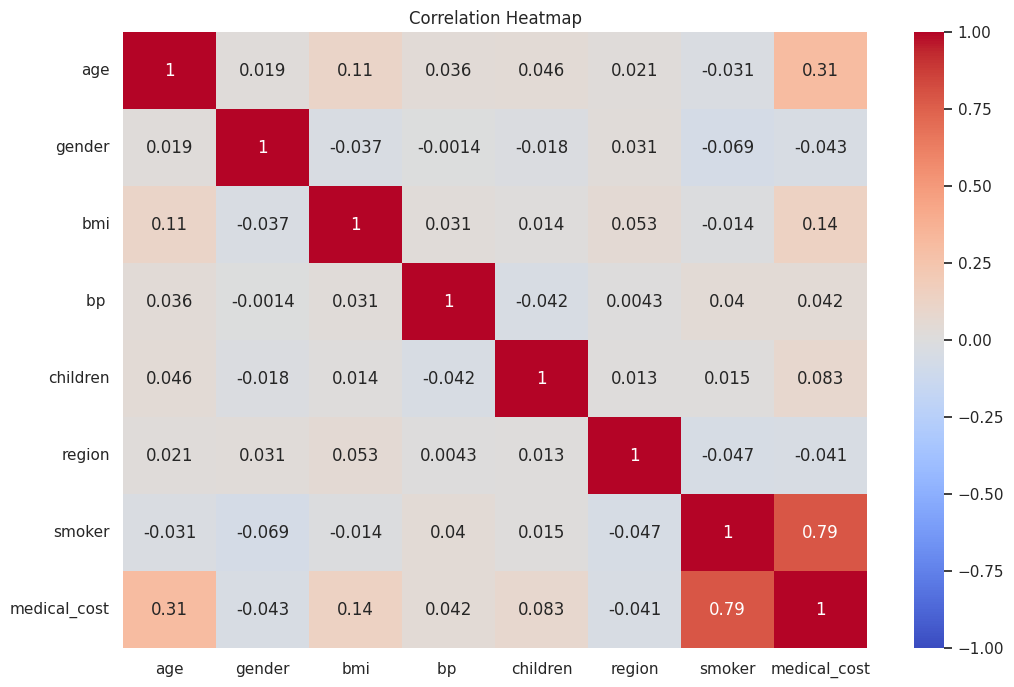

In [98]:
# Heatmap to determine the relationship between varaibles
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [99]:
#insights from the dataset

#1)Smoker and medical cost has higher correlation. People with smoking are tend to get higher medical bills.
#2)Age and medical cost has +ve correlation.
#3)BMI follows a Gaussian Distribution.
#4)Region doesnt have effect on the medical bills.